# `Bloque Cero`

## Tema: Ideas básicas sobre Python y algunos paquetes fundamentales (part4)
  

## Tópicos

- Entrada y trabajo con Ficheros

- Funciones
  

## Entrada y trabajo con Ficheros

En general `Python` puede leer y escribir ficheros de texto o binarios.

📝 ¿Qué es un Archivo?

Un archivo es una colección de datos almacenados en un dispositivo. Puede ser de texto, imagen, audio, etc.

📌 Ejemplo de un archivo de texto (archivo.txt) que puede contener lo siguiente

📌 Apertura de Archivos en Python

En Python, podemos manipular archivos fácilmente con la función `open()` cuya estructura es:

La función `open()` se usa para abrir un archivo en distintos modos, donde los modos más comunes son:


| Modo | Descripción|
|----------|------------|
|"r"|Lectura (Error si el archivo no existe)|
|"w" |Escritura (Crea un archivo nuevo o sobrescribe el existente)|
|"a" |Añadir (Agrega contenido al final del archivo)|
|"x"| Creación (Falla si el archivo ya existe)|
|"r+"| Lectura y escritura sin borrar contenido|
|"w+"| Escritura y lectura (Borra el contenido si el archivo existe)|

Ejemplos de apertura de un archivo en modo lectura:

In [1]:
file = open("data/archivo.txt", "r")  # Abre en modo lectura
contenido = file.read()  # Lee el archivo
print(contenido)  
file.close()  # Cierra el archivo

Hola, estudiantes!
Bienvenidos a la clase de Python.
Hoy aprenderemos sobre archivos.


`IMPORTANTE:` Es muy importante usar `close()` una vez que se termine de utilizar el fichero. Si dejamos el fichero abierto, podríamos llegar a tener un comportamiento inesperado que queremos evitar.

✅ Mejor Práctica: Una de las vías (y más recomendada) para leer un archivo es mediante: `with` ... `as` ... . 

Las palabras reservadas `with` y `as` se introdujeron en `Python` 2.6. Su sintaxis general es la siguiente:

`IMPORTANTE:` La sentencia `with` se usa para limpiar objetos automáticamente. Es decir, una vez que se sale del bloque el objeto creado es limpiado de memoria. En otras palabras podemos usar esta sentencia para abrir archivos en Python y dejar que el intérprete se encargue de cerrar el mismo.

En el caso de los ficheros, la expresión es una llamada a la función `open()` y la variable es la conexión con el fichero:

In [2]:
with open("data/archivo.txt", "r") as file:
    contenido = file.read()
    print(contenido)  # No es necesario cerrar el archivo manualmente

Hola, estudiantes!
Bienvenidos a la clase de Python.
Hoy aprenderemos sobre archivos.


La función `open` puede tener varios argumentos. Los más importantes son:

Donde:
- FICHERO" es la ruta absoluta o relativa hasta el fichero.

- "MODO" indica si el fichero se abre para leer, escribir o ambas cosas y si se trata de un fichero de texto o binario. `El modo predeterminado es lectura en modo texto.` Los modos de escritura son:
    - "x": únicamente crear el fichero (da error si ya existe el fichero)
    
    - "w": escribir (crea el fichero si no existe y borra el contenido anterior del fichero)
    
    - "a": añadir (crea el fichero si no existe, no borra el contenido existente y escribe al final del fichero)
- "CODIFICACIÓN" indica el juego de caracteres del fichero: "utf-8" (UTF-8), "cp1252" (ASCII para Europa occidental), etc.

`IMPORTANTE:` Si el sistema operativo utiliza de forma predeterminada el juego de caracteres `UTF-8`, no haría falta indicar el juego de caracteres al abrir el fichero. 

Para saber cuál es el juego de caracteres predeterminado se puede ejecutar en el entorno interactivo las instrucciones siguientes:

In [3]:
import locale

print(locale.getpreferredencoding(False))

UTF-8


✅ Abrir varios ficheros a la vez

Se pueden abrir varios ficheros a la vez en una única construcción `with` ... mediante varias funciones `open`(...) `as` .... separadas con comas. Cada fichero se puede abrir en un modo distinto.

In [4]:
ruta_1 = "prueba_1.txt"
ruta_2 = "prueba_2.txt"
with open(ruta_1, mode="w", encoding="utf-8") as fichero_1, \
     open(ruta_2, mode="w", encoding="utf-8") as fichero_2:
    
    print("Hola", file=fichero_1)  # ver ayuda print
    print("Adios", file=fichero_2)
    
# Que creen que haga este código?

🔍 Lectura de Archivos

Anteriormente para la lectura de un archivo usamos el comando `read()`. Sin embargo existen muchos modos de leer un archivo en Python, no solo uno. 

✅ 1. Leer un Archivo: 

Si necesitamos extraer una string que contenga todos los carácteres del archivo, podemos hacerlo usando el siguiente método: `file.read()`. Este método lee una string de un archivo abierto. Es importanten tener en cuenta que las strings en `Python` pueden contener datos binarios aparte de datos en texto.

In [13]:
# Abrimos el archivo
fo = open('data/archivo.txt', 'r+') # Archivo abierto en modo lectura y escritura
stri = fo.read()  # lee todo el archivo
print('La string del archivo es:\n' + stri)
fo.close()  # Cerramos el archivo

La string del archivo es:
 Hola, estudiantes!
Bienvenidos a la clase de Python.
Hoy aprenderemos sobre archivos.


In [10]:
# Se han preguntado como son los archivos de texto?
# stri

✅ 2. Leer una cierta cantidad de caracteres de un Archivo

Otra manera de leer un archivo es llamar a cierto número de carácteres. Por ejemplo, con el siguiente código el intérprete leerá los primeros 4 carácteres y los retornará como una string:

In [12]:
f = open('data/archivo.txt', 'r')
temp = f.read(4)  # especificamos el número de carácteres que queremos.
print(temp)  # hay ¿4?
f.close()

 Hol


In [16]:
# Repitamos
f = open('data/archivo.txt', 'r')
f.seek(1)  # localiza el cursor en la posición deseada
temp = f.read(4)  # que pasó -> cursor
print(temp)
f.close()

Hola


✅ 3. Leer un Archivo Línea por Línea

Si queremos leer un archivo línea por línea entonces podemos usar la función `readline()`. Dentro de los paréntesis se puede especificar el numero de bytes límite. Es decir, si la línea excede ese tamaño más ninguna se cargará. Por defecto es -1, es decir todas se cargan.

In [ ]:
# con open/close

# Ejemplo 1
f = open('data/archivo.txt', 'r')
a = f.readlines()  # lee todas las lineas y las separa por coma
f.close()
a  # notar como cada fila es separada por una ,

[' Hola, estudiantes!\n',
 'Bienvenidos a la clase de Python.\n',
 'Hoy aprenderemos sobre archivos.']

In [ ]:
# Ejemplo 2 (No es necesario readlines(), solo iterar)
a = []
f = open('data/archivo.txt', 'r')
for line in f:
    a.append(line)
    # print(line)
f.close()
a

[' Hola, estudiantes!\n',
 'Bienvenidos a la clase de Python.\n',
 'Hoy aprenderemos sobre archivos.']

In [22]:
# con with
# Ejemplo 1
with open('data/archivo.txt', 'r') as archivo:
    contenido = archivo.readlines() # Separamos el contenido del archivo en 

contenido

[' Hola, estudiantes!\n',
 'Bienvenidos a la clase de Python.\n',
 'Hoy aprenderemos sobre archivos.']

In [24]:
# Ejemplo 2
contenido = []
with open('data/archivo.txt', 'r') as archivo:
    for linea in archivo:  # Iteramos a traves de las lineas
        contenido.append(linea)  # Agregamos cada linea a la lista
contenido

[' Hola, estudiantes!\n',
 'Bienvenidos a la clase de Python.\n',
 'Hoy aprenderemos sobre archivos.']

In [26]:
# Ejemplo 3
contenido = []
with open('data/archivo.txt', 'r') as file:
    for linea in file:
        contenido.append(linea.strip())  # `.strip()` elimina espacios en blanco y saltos de línea
contenido

['Hola, estudiantes!',
 'Bienvenidos a la clase de Python.',
 'Hoy aprenderemos sobre archivos.']

✍ Escribir en un Archivo

Se puede escribir en el fichero
- con la función `print()` añadiendo el argumento `file=fichero`, donde fichero es la VARIABLE utilizada en la expresión `with` ... `as` ...

- con el método `write` sobre el objeto FICHERO, donde FICHERO es la variable utilizada en la expresión `with` ... `as` ...

`IMPORTANTE:`
* La función `print()` añade un salto de línea al final de la cadena añadida al fichero, pero el método `write` no lo hace, por lo que habrá que añadirlo explícitamente.

Los ejemplos siguientes muestran la diferencia entre cada uno de los modos de escritura

- `[w]` Cada vez que se ejecuta este programa, se crea nuevamente el fichero, por lo que este sólo contiene la palabra Hola.

In [ ]:
# con print 
ruta = "prueba1.txt"
with open(ruta, mode="w", encoding="utf-8") as fichero:  # notar que usamos "w" para escribir, por ende se sobreescribirá el archivo
    print("Hola", end=', ', file=fichero)
    print("Adios", file=fichero)

In [77]:
# con write
ruta = "prueba2.txt"
with open(ruta, mode="w", encoding="utf-8") as fichero:
    fichero.write("Hola\n")  # quitar el salto 
    fichero.write("Adios\n") 

- `[x]` Al ejecutar por segunda vez este programa (o a la primera si el fichero ya existe), se genera un error.

In [ ]:
ruta = "prueba1.txt"
with open(ruta, mode="x", encoding="utf-8") as fichero:
    print("Hola", file=fichero)

FileExistsError: [Errno 17] File exists: 'prueba.txt'

- `[a]` Cada vez que se ejecuta este programa, se añade al fichero una línea con la palabra Hola (si el fichero no existe, se crea).


In [80]:
ruta = "prueba1.txt"
with open(ruta, mode="a", encoding="utf-8") as fichero:
    fichero.write("Hola")
    
with open(ruta, mode="a", encoding="utf-8") as fichero:
    print("\nHola esto es un prueba", file=fichero)

✅ Una alternativa sin `with `

Somo vimos mediante `with ` el interprete se encarga de cerrar el archivo. Sin embargo en `Python` también podemos realizar nosotros estas operaciones. El primer paso sería abrir el archivo con `open` y asignarle el objeto a una variable file (f). Mediante dicho objeto podemos acceder a la información relacionada con ese archivo. 

Veamos una lista de los atributos relacionados con el objeto file:
- `f.closed` : retorna `True` si el archivo está cerrado, si no, `False`.

- `f.mode` : retorna el modo de acceso con el que el archivo ha sido abierto.

- `f.name` : retorna el nombre del archivo.

In [ ]:
# Ejemplo 1
f = open('prueba1.txt', mode ='w')
f.write('Hola mundo')
f.write('\nEste es nuestro archivo de texto\n')
f.write('Esta es otra linea\n')  # notar que no hay saltos
f.close()

In [ ]:
# Ejemplo 2
f = open('archivoPrueba.txt', mode ='w')
for _ in range(3):
    a = input('diga un número ')
    f.write(f'{a} \n')
    #print(f'{a}', file=f)  # con print
f.close()

✅ Si queremos pasarle una lista, podemos usar `writelines`. Este método se encargará de guardar todos los elementos de la lista en el fichero `sin agregar saltos de línea automáticamente`, por lo que hay que incluir `\n` si se desean agregar al final de cada línea.

In [31]:
# Ejemplo 1
lista = ["Manzana", "Pera", "Plátano"]
fichero = open("datos_guardados1.txt", 'w')
fichero.writelines(lista)
fichero.close()

In [34]:
lista = ["Manzana", "Pera", "Plátano"]
with open("datos_guardados2.txt", mode="w", encoding="utf-8") as fichero:
    fichero.writelines(lista)

In [35]:
# leyendolo
with open("datos_guardados2.txt", mode="r") as fichero:
    print(fichero.read())

ManzanaPeraPlátano


Notar que se guardó como ManzanaPeraPlátano, si queremos dejar un espacio o hacer un salto de línea debemos usar los comandos adecuados, por ejemplo:

In [40]:
lista = ["Manzana\n", "Pera\n", "Plátano"]
with open("datos_guardados2.txt", mode="w", encoding="utf-8") as fichero:
    fichero.writelines(lista)
    
with open("datos_guardados2.txt", mode="r") as fichero:
    print(fichero.read())

Manzana
Pera
Plátano


In [ ]:
# Ejercicio
archivo = open('datos_guardados2.txt', 'a')  # notar q se usó 'w' o 'a'
lineas_texto = ['\n Estas son frutas\n', 'comunes', 'en México']
archivo.writelines(lineas_texto)
archivo.close()

# Qué se leería
archivo = open('datos_guardados2.txt', 'r')
print(archivo.read())
archivo.close()

🚀 6. Archivos Binarios (Imágenes, Audio, etc.)

Si trabajamos con archivos binarios, como imágenes o música, usamos `"rb"` y `"wb"`:

In [49]:
with open("data/Foto_grupo.jpeg", "rb") as file:
    contenido = file.read()

In [51]:
# Que creen que salga?
# contenido

Al abrir el archivo Python lo lee en binario, y por tanto se necesitará una librería para visualizarla y hacer operaciones (filtros, etc.). Un ejemplo puede ser PIL [Pillow](https://pillow.readthedocs.io/en/stable/) para procesarla y [matplotlib](https://matplotlib.org).

In [53]:
from PIL import Image

# Abrir la imagen en modo binario y mostrarla con PIL
with open("data/Foto_grupo.jpeg", "rb") as f:
    img = Image.open(f)
    img.show()  # Muestra la imagen en el visor predeterminado del sistema

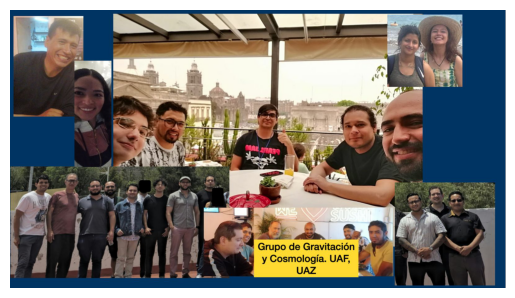

In [54]:
# Como verlo con matplotlib
import matplotlib.pyplot as plt

# Mostrar la imagen con matplotlib
plt.imshow(img)
plt.axis("off")  # Ocultar los ejes
plt.show()

Apliquemos algunos filtros

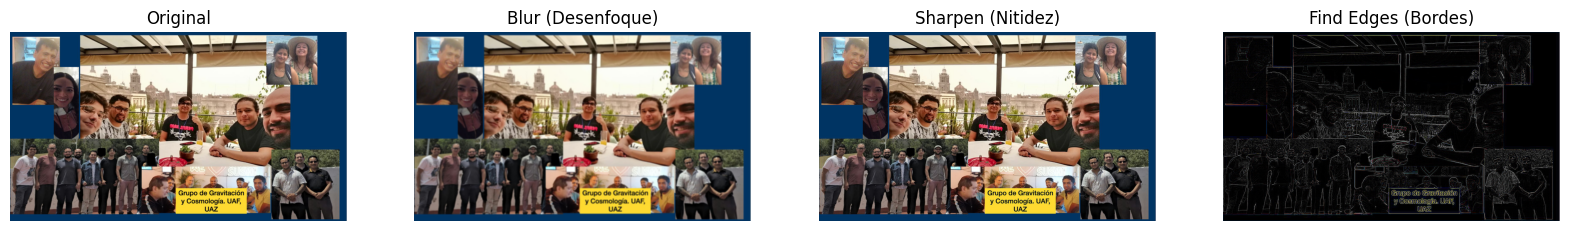

In [65]:
from PIL import ImageFilter

# Aplicar filtros
img_blur = img.filter(ImageFilter.BLUR)  # Desenfoque
img_sharp = img.filter(ImageFilter.SHARPEN)  # Aumentar nitidez
img_edge = img.filter(ImageFilter.FIND_EDGES)  # Detectar bordes

# Mostrar imágenes con matplotlib
fig, axs = plt.subplots(1, 4, figsize=(20, 20))

axs[0].imshow(img)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(img_blur)
axs[1].set_title("Blur (Desenfoque)")
axs[1].axis("off")

axs[2].imshow(img_sharp)
axs[2].set_title("Sharpen (Nitidez)")
axs[2].axis("off")

axs[3].imshow(img_edge)
axs[3].set_title("Find Edges (Bordes)")
axs[3].axis("off")

plt.show()

Ahora cual es la idea de fondo. Pura Algebra matricial.

Para ver una imagen como una matriz, podemos usar la librería [NumPy](https://numpy.org). Esto  permitirá visualizar los valores de los píxeles de la imagen como una matriz de números.

In [66]:
import numpy as np

# Convertir la imagen a una matriz numpy
img_array = np.array(img)

In [67]:
# Mostrar la matriz de la imagen
print(img_array)

[[[  0  52  99]
  [  0  52  99]
  [  0  52  99]
  ...
  [ 11  40  80]
  [155 165 175]
  [215 215 203]]

 [[  0  52  99]
  [  0  52  99]
  [  0  52  99]
  ...
  [ 11  40  80]
  [155 165 175]
  [215 215 203]]

 [[  0  52  99]
  [  0  52  99]
  [  0  52  99]
  ...
  [ 10  39  79]
  [154 164 174]
  [214 214 202]]

 ...

 [[  0  52  99]
  [  0  52  99]
  [  0  52  99]
  ...
  [ 15  44  84]
  [150 160 170]
  [210 210 198]]

 [[  0  52  99]
  [  0  52  99]
  [  0  52  99]
  ...
  [ 15  44  84]
  [151 161 171]
  [211 211 199]]

 [[  0  52  99]
  [  0  52  99]
  [  0  52  99]
  ...
  [ 11  40  80]
  [155 165 175]
  [214 214 202]]]


`Importante:` 

- En imágenes en color (RGB), cada píxel será un vector con tres valores (rojo, verde y azul) en ese orden

- Si la imagen tiene un tamaño de $h \times w $ (alto y ancho), la matriz será de dimensiones $h \times w \times 3$ (dimensión del arreglo (alto, ancho, 3)).

- El valor de cada píxel será un vector de 3 elementos: [R, G, B], donde cada valor está en el rango de 0 a 255 (para imágenes de 8 bits).

Ejemplo: Si la imagen tiene un tamaño de 3x3 píxeles y es en color, la salida sería algo así:

In [117]:
img_array2 = np.array([[[255, 0, 0], [0, 255, 0], [0, 0, 255]],
                     [[255, 255, 0], [0, 255, 255], [255, 0, 255]],
                     [[0, 0, 0], [255, 255, 255], [127, 127, 127]]])  # cambiar a [0, 0, 0]

En esta matriz:
- Cada elemento es un valor entero que representa la intensidad del color en ese píxel (en el rango de 0 a 255 para imágenes de 8 bits).

- Cada fila de la matriz corresponde a una fila de píxeles en la imagen.

- Cada elemento en la matriz es un vector con tres valores que representan el color RGB de un píxel.


En este caso:
- El píxel en la posición (0, 0) es rojo (RGB = [255, 0, 0]).
- El píxel en la posición (0, 1) es verde (RGB = [0, 255, 0]).
- El píxel en la posición (0, 2) es azul (RGB = [0, 0, 255]).

Podemos visualizar las matrices usando `imshow()`

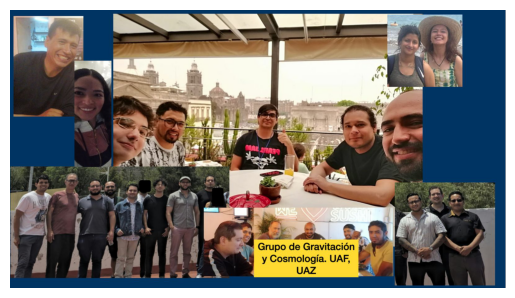

In [118]:
# Mostrar la imagen usando matplotlib
plt.imshow(img_array)
plt.axis("off")  # Ocultar los ejes
plt.show()

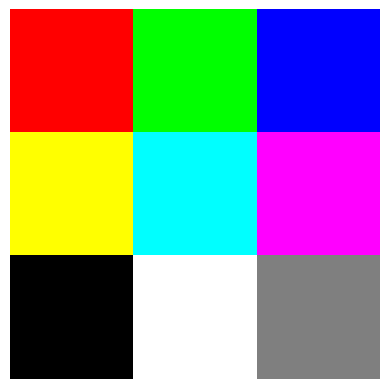

In [119]:
# Mostrar la imagen usando matplotlib
plt.imshow(img_array2)
plt.axis("off")  # Ocultar los ejes
plt.show()

#### Hagamos una app de edición de imágenes!!


1️⃣ Convertir la imagen a escala de grises

Convertir una imagen a escala de grises implica promediar los valores de los tres canales de color (RGB) en un solo valor de luminosidad. Una fórmula comúnmente utilizada para esto es:

$$\text{gris} = 0.2989 \times R + 0.5870 \times G + 0.1140 \times B $$


In [85]:
# Resolución de la imagen
img_array.shape  # Dimensiones de la imagen

(897, 1600, 3)

In [88]:
# Ejemplo de acceso a un pixel
print(img_array[0, 0])  # Primer pixel
print(img_array[0, 0, 0])  # Intensidad del color rojo del Primer pixel

[ 0 52 99]
0


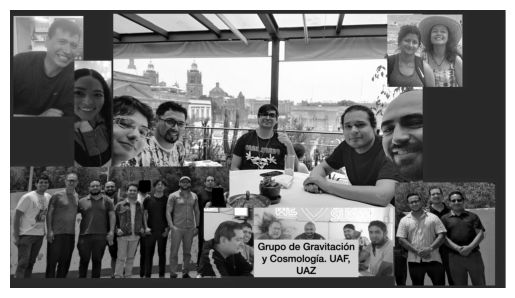

In [96]:
# Convertir a escala de grises usando la fórmula
gris_array = np.dot(img_array[..., :3], [0.2989, 0.5870, 0.1140])

# Mostrar la imagen en escala de grises
plt.imshow(gris_array, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
# Notemos que la imagen en escala de grises es un arreglo 2D
gris_array

`Importante:` 

Para una imagen en escala de grises, cada píxel solo tiene un valor que representa la intensidad de la luz, y no tiene componentes de color (rojo, verde, azul). En este caso, la matriz será de dos dimensiones, $h \times w$.

- Dimensiones del arreglo: (alto, ancho)

- Valor de cada píxel: Un solo valor entre 0 y 255 que representa la intensidad del gris.

2️⃣ Duplicar la imagen (repetir la imagen en un bloque más grande)

Si quieres “duplicar” la imagen, por ejemplo, colocar dos copias de la imagen una al lado de la otra, puedes hacerlo concatenando matrices.

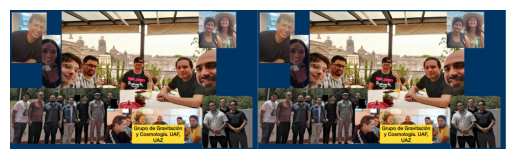

In [97]:
# Duplicar la imagen (poner dos copias una al lado de la otra)
img_dupla = np.concatenate((img_array, img_array), axis=1)  # Concatenar horizontalmente

# Mostrar la imagen duplicada
plt.imshow(img_dupla)
plt.axis("off")
plt.show()

In [ ]:
# Notemos como cambió la resolución de la imagen
print(img_array.shape)
print(img_dupla.shape)

(897, 1600, 3)
(897, 3200, 3)


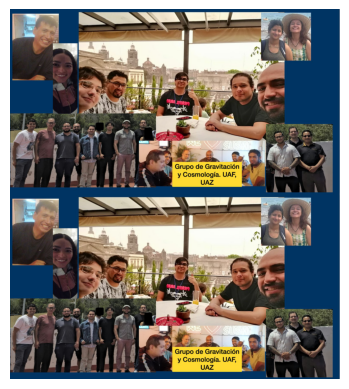

In [ ]:
# Ejercicio. Duplicar la imagen (poner dos copias una encima de la otra)
img_dupla_vert = np.concatenate((img_array, img_array), axis=0)  # Concatenar verticalmente

# Mostrar la imagen duplicada
plt.imshow(img_dupla_vert)
plt.axis("off")
plt.show()

In [101]:
# Notemos como cambión la resolución de la imagen
print(img_array.shape)
print(img_dupla.shape)
print(img_dupla_vert.shape)

(897, 1600, 3)
(897, 3200, 3)
(1794, 1600, 3)


Ejercicios:

1. Cambiar la resolución de la imagen a la mitad.

2. Rotar la imagen 90 grados en sentido horario.

3. Rotar la imagen 90 grados en sentido antihorario.

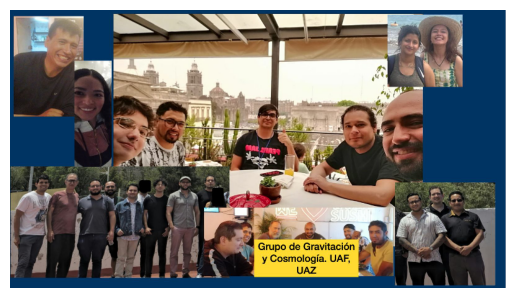

In [ ]:
# Ejercicio 1: Cambiar la resolución de la imagen a la mitad
img_reducida = img_array[::2, ::2]  # Tomar cada segundo pixel

# Mostrar la imagen reducida
plt.imshow(img_reducida)
plt.axis("off")
plt.show()

In [105]:
# Notemos como cambión la resolución de la imagen
print(img_array.shape)
print(img_reducida.shape)

(897, 1600, 3)
(449, 800, 3)


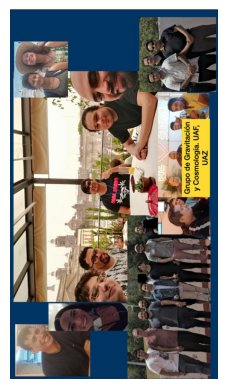

In [ ]:
# Ejercicio 2: Rotar la imagen 90 grados en sentido horario
img_rotada_90 = np.flipud(np.transpose(img_array, (1, 0, 2)))

# Mostrar la imagen rotada
plt.imshow(img_rotada_90)
plt.axis("off")
plt.show()

Explicación de la rotación
- `np.transpose` cambia el orden de los ejes (1, 0, 2). Intercambia las filas y las columnas.

- `np.flipud` voltea la matriz resultante de la transposición en sentido vertical (de arriba hacia abajo), lo que completa la rotación de 90 grados en sentido horario.

Esto da como resultado una rotación de 90 grados en sentido horario.

In [120]:
img_array_test = np.array([
  [[255, 255, 255],
  [255, 255, 255],
  [255, 255, 255]],
  #
 [[255, 0, 0],
  [0, 255, 0],
  [0, 0, 255]],
  #
 [[0, 255, 255],
  [255, 0, 255],
  [0, 255, 255]]])

np.transpose(img_array_test, (1, 0, 2))

array([[[255, 255, 255],
        [255,   0,   0],
        [  0, 255, 255]],

       [[255, 255, 255],
        [  0, 255,   0],
        [255,   0, 255]],

       [[255, 255, 255],
        [  0,   0, 255],
        [  0, 255, 255]]])

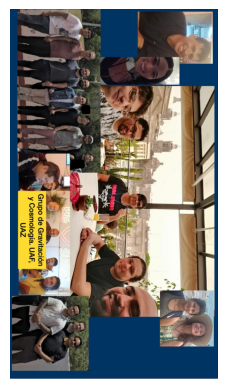

In [ ]:
# Ejercicio 3: Rotar la imagen 90 grados en sentido antihorario
img_rotada_90_izq = np.fliplr(np.transpose(img_array, (1, 0, 2)))

# Mostrar la imagen rotada
plt.imshow(img_rotada_90_izq)
plt.axis("off")
plt.show()

## Funciones

✅ ¿Qué es una función en Python?

Una función es un bloque de código con un nombre asociado, que recibe cero o más argumentos como entrada, sigue una secuencia de sentencias, la cuales ejecuta una operación deseada y devuelve un valor y/o realiza una tarea, este bloque puede ser llamados cuando se necesite.

El uso de funciones es un componente muy importante del paradigma de la programación llamada estructurada, y tiene varias ventajas:

- modularización: permite segmentar un programa complejo en una serie de partes o módulos más simples, facilitando así la programación y el depurado.

- reutilización: permite reutilizar una misma función en distintos programas.

Python dispone de una serie de funciones integradas al lenguaje, y también permite crear funciones definidas por el usuario para ser usadas en su propios programas.


#### Sentencia def
La sentencia `def` es una definición de función usada para crear objetos funciones definidas por el usuario. La definición de función no ejecuta el cuerpo de la función; esto es ejecutado solamente cuando la función es llamada.

La sintaxis para una definición de función en Python es:

donde 

- def: palabra clave para definir una función.

- nombre_de_la_funcion: nombre que le damos a la función.

- parametros: los valores que la función necesita para realizar su tarea (son opcionales).

- return: lo que la función devuelve después de ejecutar su tarea.

Un ejemplo simple de función esta seguidamente:  

In [ ]:
def suma(a, b):
    resultado = a + b
    return resultado

In [2]:
# Llamamos a la función con 3 y 5 como argumentos
resultado_suma = suma(3, 5)
print(resultado_suma)  # Salida: 8

8


`IMPORTANTE:` 

- La ejecución de una función introduce una nueva tabla de símbolos usada para las variables locales de la función. Más precisamente, **todas las asignaciones de variables en la función almacenan el valor en la tabla de símbolos local**. 

- La referencia a variables **primero** mira la tabla de símbolos local, **luego** en la tabla de símbolos local de las funciones externas, **luego** la tabla de símbolos global, y **finalmente** la tabla de nombres predefinidos. Así, no se les puede asignar directamente un valor a las variables globales dentro de una función (a menos se las nombre en la sentencia global).

`IMPORTANTE 2:` 
En `Python` todo es un objeto, incluso una función. Nótese la diferencia entre:
- `di_hola()` llama a la función.

- `di_hola` hace referencia a la función, no la llama.

#### Argumentos y parámetros

Al definir una función los valores los cuales se reciben se denominan `parámetros`, pero durante la llamada los valores que se envían se denominan `argumentos`. Los mismos se pueden asignar por:

- `Por posición`: Cuando enviá argumentos a una función, estos se reciben por orden en los parámetros definidos. Se dice por tanto que son argumentos por posición:

In [ ]:
def resta(a, b):
    return a - b

resta(10, 30)

En el ejemplo anterior el argumento 30 es la posición 0 por consiguiente es el parámetro de la función a, seguidamente el argumento 10 es la posición 1 por consiguiente es el parámetro de la función b.

- `Por nombre`: Es posible evadir el orden de los parámetros si indica durante la llamada que valor tiene cada parámetro a partir de su nombre:

In [ ]:
resta(b=30, a=10)

* `Parámetros por defecto`: Se pueden asignar valores por defecto a los parámetros. Usualmente cuando se desea comprobar se les asigna `None`

In [ ]:
def resta(a=None, b=None):
    if a == None or b == None:
        print("Error, debes enviar dos números a la función")
        return
    return a - b

* `Argumentos indeterminados`: En alguna ocasión usted no sabe previamente cuantos elementos necesita enviar a una función. En estos casos puede utilizar los parámetros indeterminados:

    - **por posición** (`args`) y,
    -  **por nombre** (`kwargs`).
    
`IMPORTANTE:` el uso de estos nombres `args, kwargs` es totalmente arbitrario, puede ponerse cualquier valor, solo es una convención lo que si es un requisito, es usar `*` y `**` junto al nombre dado.


✅ Ejemplo: Por posición (`args`) : (tuple unpacking)

In [3]:
def indeterminados_posicion(*args):
    for i in args:
        print(i, end=', ')
        
indeterminados_posicion(5,"Hola Plone",[1, 2, 3, 4, 5]) 
# notar q se imprimen en el orden de entrada

5, Hola Plone, [1, 2, 3, 4, 5], 

Notar que declarar el argumento de la forma `*args` nos permite entrar a la función una arreglo de datos cuyo tamaño puede ser dinámico (no conocemos su longitud). Internamente lo que ocurre es que el argumento que se pase será empaquetado en una tupla de manera automática.

✅ Ejemplo: Por nombre (`kwargs`): 

Para recibir un número indeterminado de parámetros por nombre (`clave-valor` o en inglés keyword args), usted debe crear un diccionario dinámico de argumentos definiendo el parámetro con dos asteriscos:

In [4]:
def indeterminados_nombre(**kwargs):
    for i in kwargs:
        print(i, "=>", kwargs[i])

indeterminados_nombre(n=5, c="Hola Plone", l=[1,2,3,4,5])  # va a entender como un diccionario, se le puede dar un diccionario de argumento

n => 5
c => Hola Plone
l => [1, 2, 3, 4, 5]


✅ Ejemplo: `Por posición y nombre`

Si requiere aceptar ambos tipos de parámetros simultáneamente en una función, entonces debe crear ambas colecciones dinámicas. Primero los argumentos indeterminados por valor y luego los cuales son por clave y valor. Es decir, primero `args` y luego `kwargs`. El orden sería el siguiente:

- Primero argumentos normales.

- Después los `*args`.

- Y por último los `**kwargs`.

In [5]:
# Ejemplo 
def super_funcion(a, *args,**kwargs):
    print(a)
    total = 0
    for i in args:
        total += i
        print("sumatoria => ", total)
    for j in kwargs:
        print(j, "=>", kwargs[j])

super_funcion(50, -1, 1.56, 10, 20, 300, a2=5, cms="Plone", edad=38)  # notar que la entrada no esta escrito como diccionario
# notar que primero toma 'a', luego los que no son diccionarios

50
sumatoria =>  -1
sumatoria =>  0.56
sumatoria =>  10.56
sumatoria =>  30.560000000000002
sumatoria =>  330.56
a2 => 5
cms => Plone
edad => 38


In [6]:
# Otro ejemplo
def funcion(a, b, *args, **kwargs):
    print("a =", a)
    print("b =", b)
    for arg in args:
        print("args =", arg)
    for key, value in kwargs.items():
        print(key, "=", value)

funcion(10, 20, 1, 2, 3, 4, x="Hola", y="Que", z="Tal")

a = 10
b = 20
args = 1
args = 2
args = 3
args = 4
x = Hola
y = Que
z = Tal


In [35]:
# Uno final!
def funcion(a, b, *args, **kwargs):
    print("a =", a)
    print("b =", b)
    for arg in args:
        print("args =", arg)
    for key, value in kwargs.items():
        print(key, "=", value)

args = [1, 2, 3, 4]
kwargs = {'x':"Hola", 'y':"Que", 'z':"Tal"}

funcion(10, 20, *args, **kwargs)

a = 10
b = 20
args = 1
args = 2
args = 3
args = 4
x = Hola
y = Que
z = Tal


Este último ejemplo se conoce como `tuple unpacking`. Usando `*`, se pueden extraer los valores de una lista o tupla, y que sean pasados como argumentos a la función.

#### Sentencia return

Las funciones pueden comunicarse con el exterior de las mismas, para ello usa la sentencia `return`.

In [ ]:
def suma2(a, b):
    suma =  a+b
    return suma

suma2(8,9)

Por defecto, las funciones retorna el valor `None`.

✅ Retorno múltiple: Una característica interesante, es la posibilidad de devolver valores múltiples separados por comas:

In [ ]:
def prueba():
    return "Plone CMS", 20, [1,2,3]

a, b, c = prueba()

print(a)

#### Paso por valor y referencia

Antes de continuar es necesario tener claro los conceptos de: `paso por valor` y `paso por referencia` que aplican a la hora de como trata una función a los parámetros que se le pasan como entrada. Su comportamiento es el siguiente:

- Si usamos un parámetro `pasado por valor`, se creará una copia `local` de la variable (a menos que se indique que es global), lo que implica que cualquier modificación sobre la misma no tendrá efecto sobre la original.
- Con una variable `pasada como referencia`, se actuará `directamente` sobre la variable pasada, por lo que las modificaciones afectarán a la variable original.

En `Python` el identificar cual de los dos casos puede ser CONFUSO. De hecho, se puede decir que siempre es por **referencia** en un cierto sentido ya que en `Python` todas las variables son referencias. Veamos unos ejemplos e intentemos entender esto:

In [38]:
x = 10
def funcion(entrada):
    entrada = 0  # notar que no hay return

funcion(x)

print(x)  # no se modificó

10


Noten que inicialmente asignamos a la variable $x$ el número $10$, el cual se lo pasamos a la función, la cual hace que dicha variable valga $0$. Ahora, dado que `Python` trata a los `int` como `pasados por valor`, dentro de la función se crea una `copia local` de $x$, por lo que la variable original no es modificada.

Veamos otro ejemplo:

Asignemos ahora a la variable $x$ una lista.

In [39]:
x = [10, 20, 30]
def funcion(entrada):
    entrada.append(40)

funcion(x)
print(x)

[10, 20, 30, 40]


En este caso `Python` trata la entrada como `pasada por referencia`, lo que hace que se modifique la variable original. Ahora, uno estaría tentado a decir que siempre que pasemos una lista (o un mutable) esta sería `pasada por referencia` ¿cierto? Pues no es tan sencillo, veamos otro ejemplo:

In [40]:
x = [10, 20, 30]
def funcion(entrada):
    entrada = []  # destruimos la variable de entrada 

funcion(x)
print(x)  # no se destruyo?!!

[10, 20, 30]


Como se aprecia no es cierto que SIEMPRE que pasemos una lista esta es `pasada por referencia`. ¿QUÉ ESTA PASANDO?

En `Python`, no se concibe la dialéctica paso por `valor o referencia`, porque este lenguaje no trabaja con el concepto de variables sino `objetos y referencias`. Al realizar la asignación, por ejemplo 

$$x = 10$$

no se dice: `x contiene el valor 10` sino que `x referencia o apunta a 10`. Así, en comparación con otros lenguajes, podría decirse que en `Python` los parámetros siempre se pasan por referencia. Ahora, ¿por qué entonces no se modificó la variable $x$ en el primer ejemplo?


La respuesta dada (y correcta) es que eran un inmutable, es decir, una vez creados, su valor no puede ser modificado. Notemos que nunca se modificó el valor, sinó que desde la perspectiva del lenguaje, `no cambiamos cambiando el valor de x de 10 a 0` sino `quitamos la referencia (apuntador) a 10 y poniéndosela a 0`. Es decir, no `cambias` el valor de un objeto sino que le asignas una nueva referencia.


¿Confuso?

Intentemos explicarlo paso a paso:

Cuando hacemos estas operaciones:

$$x = 10$$
$$n = x$$

Lo que hace el lenguaje es una copia de la referencia, de modo que al final tanto $x$ como $n$ "apuntan" al mismo objeto inmutable $10$. Ahora el paso de parámetros a una función es equivalente a esa asignación. Si la función se declara con un parámetro $x$, por ejemplo `def f(x):` y se le "llama" pasándole otro parámetro $n$, es decir `f(n)`. Lo que ocurre es que nada se llama a la función se hace la asignación `x = n`, lo que implica que se le asigna la misma referencia, es decir, el parámetro $x$ en realidad apunta al mismo objeto que la variable $n$.


¿Todo bien hasta acá?

Ahora bien, esto no significa que por el hecho de estar "apuntando" al mismo objeto, puedas cambiar el valor de éste. Eso sólo puedes hacerlo en datos que sean de tipo mutable. Una operación como ésta:

$$n =  1$$
$$n += 100$$

no cambia el "objeto 1" al que apuntaba $n$ por el valor 101. En cambio, crea un nuevo objeto de valor $101$ y reasigna la referencia $n$.


Ahora en el caso de que el objeto sea un mutable, entonces al apuntar al mismo objeto podemos modificarlo indiractamente. IMPORTANTE el modificar el objeto refiere a sus elementos.

Una forma muy útil de saber lo que pasa por debajo es haciendo uso de la función `id()`

In [42]:
x = 10
print(id(x)) # 4470463816
def funcion(entrada):
    entrada = 0
    print(id(entrada)) # 4470463496

funcion(x)

4470463816
4470463496


In [44]:
# pedir que expliquen

x = [10, 20, 30]
print(id(x)) # 4543649664
def funcion(entrada):
    entrada.append(40)
    print(id(entrada)) # 4543649664

funcion(x)  

4543744192
4543744192


In [123]:
# pedir que expliquen

x = [10, 20, 30]
print(id(x))

def funcion(x):
    x = []
    print(id(x))

funcion(x)

6133355136
6133271488


In [124]:
x

[10, 20, 30]

Ultimos comentarios

- Para modificar los tipos simples podemos devolverlos modificados y reasignarlos:

In [ ]:
def doblar_valor(numero):
    return numero * 2

n = 10
n = doblar_valor(n)
print(n)

- Y en el caso de los tipos compuestos, podemos evitar la modificación enviando una copia:

In [132]:
def doblar_valores(numeros):
    for i, _ in enumerate(numeros):
        numeros[i] *= 2
    # print(numeros)

ns = [10, 50, 100]
doblar_valores(ns[:])  # Una copia al vuelo de una lista con [:]
print(ns)

[10, 50, 100]


#### Documentación / Anotaciones en funciones

✅ Los `docstring`.

In [ ]:
def mi_funcion_suma(a, b):
    """
    Descripción de la función. Como debe ser usada,
    que parámetros acepta y que devuelve
    """
    return a+b

para aceder a la inforación es suficiente con llamar a la función `help()`: `help(mi_funcion_suma)` o como: `print(mi_funcion_suma.__doc__`).

✅ Anotaciones en funciones

Existe una funcionalidad relativamente nueva llamada function annotation o anotaciones en funciones. Dicha funcionalidad nos permite añadir metadatos a las funciones, indicando los tipos esperados tanto de entrada como de salida.

In [ ]:
def multiplica_por_3(numero: int) -> int:
    return numero*3

multiplica_por_3(6) # 18

Las anotaciones no imponen ningun criterio sobre los entradas. Esto significa que para el ejemplo anterior se puede llamar a la función con un parámetro que no sea `int`, y no obtendremos ningún error.

#### Variables `globales`

Como fue comentado todos los objetos definidos dentro de la función son tratados como `locales` es decir, no afectan el programa principal. Aunque los objetos del programa principal (u otras funciones) si pueden afectar a la función. Recordar estructura de evaluación.

En el caso de que se desee que la variable local se trate como global, solo debemos especificarlo con la palabra `global`. Veamos unos ejemplos

In [ ]:
# ¿Qué salida escribirá el siguiente programa?
#del a
def subrutina():
    global a
    print(a)
    a += 10
    return

a = 33
subrutina()
print(a)

### Funciones avanzadas. Funciones anónimas
Una función anónima, como su nombre indica es una función sin nombre. Es decir, es posible ejecutar una función sin referenciar un nombre, en `Python` puede ejecutar una función sin definirla con `def`. Las funciones anónimas se implementan con las funciones o expresiones `lambda`.

`Nota:` las funciones anónimas `lambda` sirven para realizar funciones simples, las funciones definidas con `def` sirven para manejar tareas más extensas.

In [ ]:
# Ejemplo
def doblar(numero):
    resultado = numero*2
    return resultado

type(doblar)

doblarL = lambda numero: numero*2

doblarL(2)

In [ ]:
# que daría
lambda numero: numero*2

Aunque bien es cierto que las funciones `lambda` tienen muchas limitaciones frente a las funciones `def`, estas comparten varias funcionalidades:

- Es posible tener argumentos con valor asignado por defecto.

In [ ]:
(lambda a, b, c=3: a + b + c)(1, 2)

- Se pueden pasar los parámetros indicando su nombre.

In [ ]:
(lambda a, b, c: a + b + c)(a=1, b=2, c=3)

- Puede tener un número variable de argumentos haciendo uso de `*`

In [ ]:
(lambda *args: sum(args))(1, 2, 3)

- Puede tener entradas de la forma `key=value` como si fuera un diccionario, es decir `**`

In [ ]:
(lambda **kwargs: sum(kwargs.values()))(a=1, b=2, c=3)

- Es posible devolver más de un valor

In [53]:
(lambda a, b: (b, a))(3, 9)

(9, 3)

### Funciones de orden superior (lenguaje funcional)

La programación funcional se basa principalmente en el uso de funciones, en vez de bucles for o while. Aunque `Python` no es un lenguaje puramente funcional, ofrece algunas funciones de orden superior como: `filter` y `map`. Todas ellas ofrecen una alternativa al uso de bucles para resolver ciertos problemas. 

`COMENTARIO:` Las funciones de Python pueden tomar funciones como parámetros y devolver funciones como resultado. **Una función que hace ambas cosas o alguna de ellas se llama función de orden superior**.

✅ `filter()`

La función `filter()` recibe una función y una lista devolviendo como resultado la lista inicial filtrada usando la función de entrada. Es decir, se pasa cada elemento de la lista por la función, y sólo si su resultado es `True`, se incluye en la lista de salida.

Por ejemplo, suponga que tiene una lista varios números y requiere filtrarla, quedando únicamente con los números múltiples de 5, eso seria así:

In [ ]:
# ejemplo
lista = [7, 4, 16, 3, 8, 25, 5, 100]
pares = filter(lambda x: x % 5 == 0, lista)
print(list(pares))

# equivalente
lista = [7, 4, 16, 3, 8, 25, 5, 100]
def es_par(x):
    return x % 5 == 0

pares = filter(es_par, lista)
print(list(pares))

In [ ]:
# otros ejemplos

# list of letters
letters = ['a', 'b', 'd', 'e', 'i', 'j', 'o']

# function that filters vowels
def filterVowels(letter):
    vowels = ['a', 'e', 'i', 'o', 'u']

    if (letter in vowels):
        return True
    else:
        return False

filteredVowels = filter(filterVowels, letters)
print('The filtered vowels are:', list(filteredVowels))


# se busca las palabras q empiecen con vocal
creature_names = ['Sammy', 'Ashley', 'Jo', 'Olly', 'Jackie', 'Charlie']
print(list(filter(lambda x: x[0].lower() in 'aeiou', creature_names)))

✅ `map()`

La función `map()` toma una función y una lista y aplica esa función a cada elemento de esa lista, produciendo una nueva lista.

Ejemplo:

In [ ]:
def doblar(numero):
    return numero*2

numeros = [2, 5, 10, 23, 50, 33]

list(map(doblar, numeros))  # notar que no se le da asignaciones a la función

# list(map(lambda x: x*2, numeros))  # con una función lambda

In [58]:
base_numbers = [2, 4, 6, 8, 10, 12, 14, 16]
powers = [1, 2, 3, 4, 5]

numbers_powers = list(map(pow, base_numbers, powers))  # como pow recibe dos argumentos, map tiene dos listas
# numbers_powers = list(map(lambda x, y : x**y, base_numbers, powers))
print(numbers_powers)

[2, 16, 216, 4096, 100000]


In [59]:
#?pow

#### Funciones recursivas
Las funciones recursivas son funciones que se llaman a sí mismas durante su propia ejecución. 

✅  Función recursiva sin retorno:

Un ejemplo de una función recursiva sin retorno, es el ejemplo de cuenta regresiva hasta cero a partir de un número:

In [ ]:
def cuenta_regresiva(numero):
        numero -= 1
        if numero > 0:
            print(numero)
            cuenta_regresiva(numero)
        else:
            print("Boooooooom!")
            print("Fin de la función", numero)

cuenta_regresiva(5)

✅  Función recursiva con retorno: 

Un ejemplo de una función recursiva con retorno, es el ejemplo del calculo del factorial de un número corresponde al producto de todos los números desde 1 hasta el propio número.

In [61]:
# tradicional
def factorial_tradicional(n):
    r = 1
    i = 2
    while i <= n:
        r *= i
        i += 1
    return r

# recursivo
def factorial_recursivo(numero):
    #print("Valor inicial ->", numero)
    if numero > 1:
        numero *= factorial_recursivo(numero-1)
        #print("valor final ->",numero)
    return numero

factorial_recursivo(5), factorial_tradicional(5)

(120, 120)

#### Decoradores/Generadores

✅  Decoradores: estos son funciones que modifican el comportamiento de otras. Para ello usan la `@` ante un decorador o decorator.

Intentemos entender el funcionamiento mediante el siguiente ejemplo: considere que tenemos una función `suma()` que vamos a decorar usando `mi_decorador()`. Para ello, antes de la declaración de la función suma, hacemos uso de `@mi_decorador`.

In [134]:
def mi_decorador(funcion):
    def nueva_funcion(a, b):
        print("Se va a llamar")
        c = funcion(a, b)
        print("Se ha llamado")
        return c
    return nueva_funcion

@mi_decorador
def suma(a, b):
    print("Entra en funcion suma")
    return a + b

suma(5,8)

Se va a llamar
Entra en funcion suma
Se ha llamado


13

Lo que realiza `mi_decorador()` es definir una nueva función que encapsula o envuelve la función que se pasa como entrada. En este caso lo que hace es hace uso de dos `print()`, uno antes y otro después de la llamada la función.

Por lo tanto, cualquier función que use `@mi_decorador` tendrá dos print, uno al principio y otro al final, dando igual lo que realmente haga la función.

Veamos otro ejemplo usando el decorador sobre otra función.

In [135]:
@mi_decorador
def resta(a, b):
    print("Entra en funcion resta")
    return a - b

resta(5, 3)

Se va a llamar
Entra en funcion resta
Se ha llamado


2

En el caso de querer que el decorador reciba un `parámetro` de entrada para modificar su comportamiento. Se puede hacer envolviendo una vez más la función como se muestra en el ejemplo:

In [136]:
def mi_decorador(arg):  # notar como se envolvió con otra funcion
    def decorador_real(funcion):
        def nueva_funcion(a, b):
            print(arg)
            c = funcion(a, b)
            print(arg)
            return c
        return nueva_funcion
    return decorador_real

@mi_decorador("Imprimer esto antes y después")  # notar como paso el argumento al decorador
def suma(a, b):
    print("Entra en funcion suma")
    return a + b

suma(5,8)

Imprimer esto antes y después
Entra en funcion suma
Imprimer esto antes y después


13

Veamos ahora otro ejemplo más real (tomado de https://ellibrodepython.com)

In [6]:
def log(fichero_log):  # argumento
    def decorador_log(func):  # decorador
        def decorador_funcion(*args, **kwargs):
            with open(fichero_log, 'a') as opened_file:
                output = func(*args, **kwargs)
                opened_file.write(f"{output}\n")
        return decorador_funcion
    return decorador_log

@log('ficherosalida.txt')
def suma(a, b):
    return a + b

@log('ficherosalida.txt')
def resta(a, b):
    return a - b

@log('ficherosalida.txt')
def multiplicadivide(a, b, c):
    return a*b/c

# ejecutando
suma(10, 30)
resta(7, 23)
multiplicadivide(5, 10, 2)

En este ejemplo usamos el decorador de tal forma que nos permita escribir en un fichero los resultados de ciertas operaciones.


In [139]:
# otro ejemplo
autenticado = False

def requiere_autenticación(f):
    def funcion_decorada(*args, **kwargs):
        if not autenticado:
            print("Error. El usuario no se ha autenticado")
        else:
            return f(*args, **kwargs)
    return funcion_decorada

@requiere_autenticación
def di_hola():
    print("Hola")
    
di_hola()

Error. El usuario no se ha autenticado


✅ Generadores (Generator)

Como hemos visto, para acceder a la salida de una función en `Python` usamos la sentencia `return`. Sin embargo, esta no es la única forma en que devuelve el resultado, otra forma es mediante el uso de `yield`.

Veamos un ejemplo:

In [12]:
def funcion():
    return 'hola'

def generador():
    yield 'hola'

In [13]:
## llamemos a las dos funciones
print(funcion())
print(generador())

hola
<generator object generador at 0x10ed107d0>


Como podemos apreciar, la función con el comando `return` nos devuelve el valor asignado, mientras que la que usa `yield` nos devuelve un objeto de la clase generator. Es decir, si una función usa el comando `yield` se convertirá en un generador. Una función generadora se diferencia de una función normal en que tras ejecutar el `yield`, esta devuelve el control a quién la llamó, pero la función es *pausada* y el estado (valor de las variables) es guardado. Esto permite que su ejecución pueda ser reanudada más adelante y poder acceder a la variable puesto a que codifican los métodos `__iter__()` y `__next__()`. Entonces podemos acceder vía `next()` sobre ellos y dado que son iterables, arrojaría también un `StopIteration` cuando se ha llegado al final.

In [16]:
# Usemos next
a = generador()
print(next(a))
print(next(a))

hola


StopIteration: 

Noten como al usar por segunda vez `next` arrojó la excepción `StopIteration`. Esto se debe a que cada vez que se usa `next()` sobre el generador, se llama y se continúa su ejecución después del último `yield`. Y en este caso solo tenemos un `yield` no se generan más valores.

In [17]:
def generador():
    n = 1
    yield n

    n += 1
    yield n

    n += 1
    yield n

In [18]:
for i in generador():
    print(i)

1
2
3


Los **generadores**  también pueden ser creados de manera similar a una **list comprehensions**, pero cambiando el corchete `[]` por paréntesis `()`.

In [21]:
lista = [2, 4, 6, 8, 10]
al_cuadrado = [x**2 for x in lista]
print(al_cuadrado)
print()

al_cuadrado_generador = (x**2 for x in lista)
print(al_cuadrado_generador)

print()
for i in al_cuadrado_generador:
    print(i)

[4, 16, 36, 64, 100]

<generator object <genexpr> at 0x10ed75cb0>

4
16
36
64
100


La diferencia entre una **list compregensions** y **generators** es que en el caso de los últimos, los valores no están almacenados en memoria, sino que se van generando a medida que se llaman (se ejecuta el código). 

Esto último es una de las principales ventajas de los generadores, ya que los elementos sólo son generados cuando se "piden", lo que hace que sean mucho más eficientes en lo relativo a la memoria. Veamos un ejemplo: Sumemos los primeros $100$ números naturales ([ver comparativas](https://wiki.python.org/moin/Generators)). Una opción podría ser crear una lista de todos ellos y después sumarla. En este caso, todos los valores son almacenados en memoria, algo que podría ser un problema si la cantidad de número es muy grande, por ejemplo intentamos sumar los primeros $10^{10}$ números.

In [23]:
import sys

In [27]:
# Usemos una lista
def primerosn(n):
    nums = list(range(n))
    return nums

nums = primerosn(100)
print('El tamaño es:', sys.getsizeof(nums), 'bytes')  # bytes
    
print(sum(nums))

El tamaño es: 856 bytes
4950


In [32]:
# Usemos un generador
def primerosn(n):
    for i in range(n):
        yield i

a = primerosn(100)
sumNum = 0
for i in range(100):
    sumNum += next(a)

print('El tamaño es:', sys.getsizeof(i), 'bytes')  # bytes
print(sumNum)

# print(sum(primerosn(100)))  # método rápido

El tamaño es: 28 bytes
4950


COMENTARIO FINAL: en ocasiones para ahorra memoria, podemos usar los diccionarios como cache, lo cual nos ahorra memoria.